In [2]:
import multiprocessing

In [3]:
# pip install gensim
import gensim

In [4]:
import re
import pymystem3
import functools
import collections
import itertools
import json

In [5]:

# In[3]:

mystem = pymystem3.Mystem()

def clear_string(word):
    return re.sub(r'[^\w\s]', '', word)


STOP_POS = frozenset([
    'PREP', 'CONJ', 'PRCL',
    'INTJ', 'NPRO', 'PRED',
    'ADJF',
])


# Список слов, которые заменяются на "Мужское имя"
BOYS_NAME_LIST = frozenset(
    ['Абрам', 'Август', 'Авдей', 'Аверкий', 'Авксентий', 'Авраам', 'Автоном', 'Агап', 'Агафон', 'Аггей', 'Агей',
     'Адам', 'Адольф', 'Адриан', 'Азарий', 'Аким', 'Александр', 'Александр', 'Алексей', 'Алексей', 'Альберт',
     'Альтаир', 'Альфред', 'Амвросий', 'Амос', 'Ананий', 'Анатолий', 'Анатолий', 'Андрей', 'Андрей', 'Андриан',
     'Андрон', 'Андроник', 'Аникей', 'Аникита', 'Анисим', 'Антип', 'Антон', 'Антонин', 'Аполлинарий',
     'Аполлон', 'Арефий', 'Аристарх', 'Аркадий', 'Аркадий', 'Арсен', 'Арсен', 'Арсений', 'Арсений', 'Арсений',
     'Артем', 'Артем', 'Артемий', 'Артемий', 'Артур', 'Артём', 'Архип', 'Архип', 'Аскольд', 'Афанасий', 'Афиноген',
     'Бажен', 'Бенедикт', 'Богдан', 'Богдан', 'Болеслав', 'Болеслав', 'Бонифаций', 'Борис', 'Борис', 'Борислав',
     'Боян', 'Бронислав', 'Бронислав', 'Будимир', 'Вадим', 'Вадим', 'Вадим', 'Валентин', 'Валентин', 'Валентин',
     'Валерий', 'Валерий', 'Валерий', 'Валерьян', 'Валерьян', 'Вальтер', 'Варлаам', 'Варлаам', 'Варлам', 'Варлам',
     'Варфоломей', 'Варфоломей', 'Василий', 'Василий', 'Василий', 'Василиск', 'Василиск', 'Велимир', 'Велимир',
     'Венедикт', 'Венедикт', 'Вениамин', 'Вениамин', 'Вениамин', 'Викентий', 'Викентий', 'Виктор', 'Виктор',
     'Виктор', 'Викторин', 'Викторин', 'Вильгельм', 'Виссарион', 'Виссарион', 'Виталий', 'Виталий', 'Виталий',
     'Владилен', 'Владилен', 'Владимир', 'Владимир', 'Владимир', 'Владислав', 'Владислав', 'Владислав', 'Владлен',
     'Владлен', 'Влас', 'Влас', 'Влас', 'Вольдемар', 'Всеволод', 'Всеволод', 'Всеволод', 'Всемил', 'Всемил',
     'Всеслав', 'Всеслав', 'Вышеслав', 'Вышеслав', 'Вячеслав', 'Вячеслав', 'Вячеслав', 'Гавриил', 'Гавриил',
     'Гаврила', 'Галактион', 'Гамлет', 'Гарри', 'Гедеон', 'Геннадий', 'Геннадий', 'Генрих', 'Георгий', 'Георгий',
     'Георгий', 'Егор', 'Герасим', 'Герман', 'Герман', 'Глеб', 'Глеб', 'Гордей', 'Гордей', 'Гостомысл', 'Гремислав',
     'Григорий', 'Григорий', 'Гурий', 'Давид', 'Давид', 'Давыд', 'Давыд', 'Давид', 'Даниил', 'Даниил', 'Даниил',
     'Данила', 'Дементий', 'Демид', 'Демьян', 'Демьян', 'Денис', 'Денис', 'Дмитрий', 'Дмитрий', 'Добромысл',
     'Доброслав', 'Донат', 'Дорофей', 'Евгений', 'Евгений', 'Евграф', 'Евдоким', 'Евдоким', 'Евлампий',
     'Евлампий', 'Евсей', 'Евстафий', 'Евстигней', 'Егор', 'Егор', 'Елизар', 'Елисей', 'Елисей', 'Емельян',
     'Епифан', 'Еремей', 'Ермил', 'Ермолай', 'Ерофей', 'Ефим', 'Ефим', 'Ефрем', 'Ефрем', 'Ждан', 'Захар',
     'Зиновий', 'Иван', 'Иван', 'Игнат', 'Игнатий', 'Игнатий', 'Игорь', 'Игорь', 'Измаил', 'Изот',
     'Изяслав', 'Иларион', 'Илларион', 'Илья', 'Илья', 'Иннокентий', 'Иннокентий', 'Иоан', 'Иосиф', 'Иосиф',
     'Осип', 'Ипат', 'Ипатий', 'Ипполит', 'Ипполит', 'Ираклий', 'Исаак', 'Исаакий', 'Исаакий', 'Исай',
     'Исидор', 'Карл', 'Карэн', 'Кирил', 'Кирилл', 'Кондрат', 'Константин', 'Кристиан', 'Лавр', 'Лаврентий',
     'Лаврентий', 'Ладимир', 'Лазарь', 'Лев', 'Лев', 'Леон', 'Леонард', 'Леонид', 'Леонид', 'Леонтий',
     'Леонтий', 'Лонгин', 'Лука', 'Лукьян', 'Лучезар', 'Любим', 'Любомир', 'Любомысл', 'Людвиг', 'Макар',
     'Макар', 'Максим', 'Максим', 'Максимилиан', 'Максимилиан', 'Максимильян', 'Мануил', 'Марат', 'Мариан',
     'Марк', 'Марк', 'Мартин(Мартын)', 'Мартын', 'Мартьян', 'Матвей', 'Матвей', 'Мефодий', 'Мечислав',
     'Милан', 'Милен', 'Милий', 'Мина', 'Мир', 'Мирон', 'Мирон', 'Мирослав', 'Мирослав', 'Митрофан',
     'Михаил', 'Михей', 'Модест', 'Моисей', 'Моисей', 'Мокей', 'Мстислав', 'Назар', 'Наркис',
     'Натан', 'Наум', 'Нестер', 'Нестор', 'Никандр', 'Никанор', 'Никита', 'Никифор', 'Никодим', 'Никола',
     'Николай', 'Никон', 'Нил', 'Нифонт', 'Овидий', 'Олег', 'Олесь', 'Онисим', 'Онисим', 'Осип', 'Оскар',
     'Остап', 'Павел', 'Панкрат', 'Панкратий', 'Пантелей', 'Пантелеймон', 'Панфил', 'Парамон', 'Парфен',
     'Парфений', 'Пахом', 'Петр', 'Пимен', 'Платон', 'Поликарп', 'Порфирий', 'Потап', 'Пров', 'Прокл',
     'Прокоп', 'Прокопий', 'Прокофий', 'Прохор', 'Радик', 'Радим', 'Радислав', 'Радован',
     'Ратибор', 'Ратмир', 'Рафаил', 'Рафаэль', 'Рафик', 'Ринат', 'Ричард', 'Роберт', 'Родион',
     'Рома', 'Роман', 'Роман', 'Ростислав', 'Ростислав', 'Рудольф', 'Руслан', 'Руслан', 'Рустам', 'Рюрик',
     'Савелий', 'Самуил', 'Святослав', 'Семен', 'Серафим', 'Сергей', 'Спартак', 'Спиридон', 'Станислав',
     'Степан', 'Тамирлан', 'Тарас', 'Тарас', 'Твердислав', 'Творимир', 'Теодор', 'Терентий', 'Терентий',
     'Тигран', 'Тимофей', 'Тимофей', 'Тимур', 'Тимур', 'Тит', 'Тихон', 'Тихон', 'Трифон', 'Трофим', 'Трофим',
     'Ульян', 'Устин', 'Фадей', 'Фарид', "Федя", 'Федор', 'Федор', 'Федосей', 'Федосий', 'Федот', 'Феликс', 'Феликс',
     'Феодосий', 'Феоктист', 'Феофан', 'Феофан', 'Ферапонт', 'Филимон', 'Филип', 'Филипп', 'Филипп', 'Фирс',
     'Флор', 'Флорентин', 'Фока', 'Фома', 'Фома', 'Фортунат', 'Фотий', 'Фридрих', 'Фрол', 'Фёдор', 'Харитон',
     'Харлампий', 'Христофор', 'Эдвард', 'Эдгар', 'Эдуард', 'Эльдар', 'Эмиль', 'Эрик', 'Эрнест', 'Ювеналий',
     'Юджин', 'Юлиан', 'Юлиан', 'Юлий', 'Юлий', 'Юрий', 'Юрий', 'Юхим', 'Яков', 'Ян', 'Янус', 'Ярослав',
     'Саша', 'Ганс','Макс','Максим', "Алекс", "Тони", "Эрчин", "Вейд", "Лавини", "Димитро", "Иссей", "Рольф",
     "Василя", "Зак", "Грэм", "Моргот", "Лиам", "Яго", "Эдди", "Мануйл", "Амери", "Митя", "Мати", "Дима", "Семён", "Алик",
     "Пётр", "Яша", "Игар", "Пашка", "Гаррик", "Чарли", "Димка", "Лёня", "Аксен", "Анастасий", "Джон", "Эштон", "Питер",
      "Сурен", "Бруно","Ален","Умарь","Ярго","Марель", "Азар","Рик", "Хелена", "Рашид", "Рикардо", "Дориан","Вейд","Вэйд",
      "Аят", "Панголин", "Исраил", "Амадей", "Джо", "Мэтью", "Браун", "Маркус",
      "Джимми", "Джим", "Джеймс", "Юджин", "Грэга", "Грэг","Морис", "Рэм", "Никс", "Колька", "Влад", "Вася",
      "Жек","Жека", "Ваня", "Ванька", "Анри", "Стоун", "Ванечка", "Анджело", "Грейс", "Ван", "Вани", "Факундо",
        "Ванюша", "Армин", "Ленард", "Дениэл", "Дэниэл", "Киан","Борман", "Ахмет", "Джош", "Тихвин", "Грег",
     "Алан", "Патрик", "Жак", "Смит", "Мигель", "Фрост", "Джина", "Раяна", "Лекс", "Эрих", "Раф", "Павло", "Пабло",
     "Стив", "Билл", "Бенедикто", "Доминик", "Билль", "Мэгга", "Вовчик", "Амариллис", "Родик", "Бим", "Аландо", "Жан",
     "Сильвестр", "Роланд", "Володя", "Себастьян", "Виталик", "Ромка", "Казимир", "Себастьян", "Вовик", "Мэт",
     "Гришка", "Гриша", "Бен", "Бэн", "Ленька", "Лёнька", "Зуев", "Малик", "Антоша", "Семёнов", "Мичурин", "Джеки"
     "Джек", "Кай", "Савва", "Тимоха", "Жерар", "Рихард", "Василий", "Мотя", "Джастин", "Василёк", "Прокофьев",
     "Илюшка", "Толика", "Витя", "Георг", "Вит", "Фред", "Волан", "Роберто", "Ромэо", "Ромео", "Джесси", "Рюг", "Раймонд",
     "Гаспар", "Киса", "Алексий", "Армель", "Тимофеев", "Карло", "Гущин", "Тео", "Лёшка", "Изар", "Джалал", "Брюсов", "Афоня",
     "Гоша", "Димона", "Димон", "Эйтан", "Юрик", "Паша", "Славик", "Дамир", "Савченко", "Филя", "Колин", "Рудаков", "Тайлера",
     "Саид", "Иса", "Мурад", "Венцель", "Юсуф", "Симеон", "Лорик", "Гонорий", "Хайк", "Исмаил", "Мустафа", "Голованов",
     "Йося", "Гилберт", "Рон", "Майк", "Алистер", "Антонов", "Лёва", "Михаэль", "Камил", "Ланс", "Богров", "Илюха", "Алек",
     "Сережа", "Митька", "Тишка", "Стаст", "Анфис", "Романов", "Галар", "Николя", "Эван", "Фокс", "Коул", "Ирвин",
     "Макфлай", "Уэйн", "Стивен", "Томас", "Ден", "Уильям", "Андрэ", "Мусин", "Кузя", "Крамер", "Джейк", "Хант", "Джеффри",
     "Алексашка", "Мэддисон", "Сашка", "Фил", "Кейн", "Арчибальд", "Тимка", "Чоу", "Эрклион", "Коля", "Валерка", "Коляна",
     "Колян", "Вадик", "Брайан", "Арик", "Хасан", "Ларионов", "Фима", "Прохоров", "Волошка", "Мурза", "Трунов", "Левушка",
     "Валя", "Вале", "Валей", "Валюш", "Валер", "Валера", "Валерий", "Лидий", "Сергеев", "Эраст", "Ашот", "Лёшик",
     "Хенрик", "Браун", "Данил", "Рабби", "Росс", "Самсон", "Антуан", "Фомин", "Фадеев", "Авгур", "Пластун", "Скобелев",
     "Фролов", "Сирин", "Ахмед", "Вартан", "Болотов", "Лопухин", "Фет", "Марков", "Александэр", "Лаптев", "Мартынов",
     "Свирский", "Икар", "Некит", "Крымов", "Чайковский", "Тихомирова", "Абель", "Гейнц", "Агнес", "Дитрих", "Морган",
     "Герберт", "Хаим", "Марти", "Майер", "Франсуа", "Тэйт", "Генка", "Арнольд", "Миронов", "Миха", "Миша", "Мишаня",
     "Лешек", "Олежка", "Иванов", "Степанов", "Сашенек", "Фредерик", "Реми", "Эдик", "Серж", "Кузнецов", "Иванушка",
    "Самойлов", "Мухин", "Ибрахим", "Брайса", "Хеллинга", "Каин", "Авель", "Саня", "Кротов", "Щербаков", "Рогов", "Лазарев",
     "Васенька", "Эрклион", "Курт", "Гарин", "Иов", "Сьюзи", "Сани", "Пронин", "Николос", "Хомич", "Френсис", "Сизов",
     "Клюев", "Поликарпыч", "Поликарпыча", "Мышкин", "Захарий", "Иванцаревич", "Плетнёв", "Васильев", "Джерри", "Митяй",
     "Майкл", "Оливер", "Рамон", "Фреда", "Фрэда", "Мохинь", "Мелис", "Амур", "Ритик", "Альдо", "Ярош", "Гарик", "Гай",
     "Богданов", "Лебедев", "Зураб", "Самуэль", "Иона", "Лукас", "Сеня", "Элвис", "Берг" "Рональд", "Пион", "Джони",
     "Вилли", "Керн", "Августин", "Томпсон", "Гришин", "Ральф", "Робби", "Брут", "Михайло", "Павлов", "Костик",
     "Вельмить", "Девид","Дэвид", "Сидор", "Николаев", "Алевтин", "Кирюха", "Шейла", "Налим", "Герш", "Мишин", "Жуков",
     "Мэй", "Лямин", "Дир", "Микола", "Султанбек", "Нолана", "Первушин", "Канис", "Майлз", "Вова", "Гаврил", "Себастьян",
     "Бертрам", "Уилла","Рауль", "Энж", "Голди", "Армандо", "Дронов", "Юрген", "Санчёс", "Санчес", "Смолев", "Кристофер",
     "Ник", "Мишка", "Алёша", "Данька", "Валька", "Сёма", "Говард", "Салим", "Дэнни", "Джозеф", "Джефф", "Клауд", "Хорн",
     "Кох", "Тед", "Тор", "Муса", "Фрэнк", "Гордон", "Берт", "Маркий", "Энцо", "Мак", "Кравцов","Майло", "Надир",
     "Октавий",  "Горацио",  "Анатолий", "Боб", "Шон", "Энди", "Берси", "Тун", "Герд", "Франклин", "Яго", "Монтана",
     "Исса", "Бажэн", "Бажен", "Линкольн", "Хендриксон", "Сэн", "Дэнель", "Дэниэль","Даниэль", "Даниель", "Боря",
     "Лео", "Клим", "Волков","Павлик", "Антоний", "Данило", "Клаус", "Хенсель", "Коробкин", "Арман", "Андреев" "Путилин",
    "Луи", "Андре", "Ларин", "Роджер", "Юра", "Юр", "Грегори", "Чен", "Костя", "Остапенко", "Ушаков", "Рейнер", "Рейнор",
     "Горбунов", "Сайф", "Марсик", "Улисс", "Фредди", "Дункан", "Франциск", "Петька", "Алессандро", "Клавдий", "Саныч",
     "Стас", "Дэн", "Стасик", "Дэнчик",
     ]
)


# Список слов, которые заменяются на женские имена
GIRLS_NAME_LIST = frozenset(
    [
        "Катя", "Юля", "Кат", "Юли","Юлия", "Катюша", "Ассоль", "Джена", "Милла", "Ульянка", "Кадмона", "Кэрролл",
        "Кэрролл", "Маша", "Аля", "Ида", "Соня",
        "Энн", "Лайза", "Луиза", "Луиз", "Матильда", "Эллис", "Машенька", "Уиль", "Мара", "Саманта", "Люда", "Мэг",
        "Джейн","Ариан", "Валачча", "Харальда", "Вианда", "Джу", "Джессика", "Людочка", "Джесс", "Настенёк",
        "Алин", "Алине", "Томка", "Риша", "Силиса", "Валюшка", "Джуна", "Дженна", "Элли", "Элен", "Софа",
        "Майра", "Ксеня", "Альбена", "Анюта", "Пенни", "Дастина", "Лукреция", "Сьюзен", "Варёк", "Лэй", "Эйден",
        "Маринка", "Мария", "Ариэль", "Рэн", "Настасья", "Аврора", "Алатэя", "Дарси", "Коркина", "Эристина",
        "Марьин", "Лита", "Саломея", "Камелия", "Габриэла", "Варя", "Душкина", "Любаша", "Любка","Наташка", "Наташа",
        "Маня", "Зина","Верочка", "Зинка", "Ксюхий", "Эли", "Кларисса", "Николина", "Альба", "Эрис", "Костылёва",
        "Лизавета", "Феня", "Зосима", "Айсу", "Альма", "Валери", "Энни", "Шэль", "Аида", "Изабель", "Катрина", "Альбин",
        "Альбина", "Эрина", "Сонька", "Мелинда", "Нюра", "Долли", "Сюзанна", "Мелинда", "Лилька", "Ося",
        "Марго", "Регин", "Регина", "Элиса", "Джульетта", "Триша", "Жозефина", "Лера", "Лерочка", "Кейт",
        "Люся",  "Ефросинья", "Олафа",  "Джилла", "Лилечка", "Марибель", "Ребекка", "Лола", "Нина", "Кэт", "Кэти",
        "Таня", "Женя","Танька", "Женька", "Юля", "Юлька", "Танечка", 'Танюша', "Танин", "Жасмина", "Кларисса", "Женька",
        "Вивиана","Айсонака","Рита", "Мелисса", "Эмма", "Алавира", "Нюся", "Шарлотта", "Жюстина", "Дебби", "Клэр", "Джэс",
        "Клодия", "Лив", "Алёхина", "Марьям", "Лескюр",  "Лайон", "Поленька", "Эмма", "Элвира", "Стефани", "Ксюша"
        "Хелма", "Ирена", "Алёнка", "Маша", "Машка", "Настя", "Айседора", "Лена", "Ленка", "Елена","Леночка", "Аня", "Ксана",
        'Аделия', 'Августа','Августина', 'Авигея', 'Аврора', 'Агата', 'Агнесса', 'Агния', 'Ада', "Катерина", "Галя"
        'Аделина', 'Адель', 'Адельфина', 'Аза', 'Азалия', 'Азиза', 'Аида', 'Айлин', 'Аксинья', "Марин", "Анжела","Анжел",
        'Алевтина', 'Александра', 'Александрина', 'Алика', 'Алина', 'Алира', 'Алира', 'Алиса', "Натали"
        'Алия', 'Алла', 'Альберта', 'Альбина', 'Альвина', 'Альжбета', 'Алёна', 'Амелия','Амалия', "Эми", "Эмми",
        'Амина', 'Амира', 'Анастасия', 'Ангелина', 'Андриана', 'Анжела', 'Анжелика', 'Лика', "Аделаида",
        'Анжиолетта', 'Анисья', 'Анита', 'Анна', 'Антонина', 'Анфиса', 'Анэля', 'Ариадна', "Мариночка", "Фиса"
        'Арина', 'Артемида', 'Архелия', 'Арьяна', 'Асида', 'Астра', 'Ася', 'Аурелия', 'Аэлита', "Шура", "Мена", "Даша",
        'Аюна', 'Беатриса', 'Белла', 'Береслава', 'Берта', 'Биргит', 'Богдана', 'Божена', 'Борислава',
        'Бронислава', 'Валентина', 'Валерия', 'Ванда', 'Ванесса', 'Варвара', 'Василиса', 'Венера',
        'Вера', 'Верона', 'Вероника', 'Версавия', 'Веселина', 'Весняна', 'Веста', 'Вида','Видана',
        'Виктория', 'Вилора', 'Винетта', 'Виоланта', 'Виолетта', 'Виргиния', 'Виталина', 'Влада',
        'Владислава', 'Владлена', 'Властилина', 'Габи', 'Габриэлла', 'Галина', 'Гаянэ', 'Гелана',
        'Гелена', 'Гелианна', 'Гелла', 'Генриетта', 'Георгина', 'Гера', 'Герда', 'Гертруда',
        'Глафира', 'Глория', 'Гражина', 'Грета', 'Дана', 'Даниэла', 'Дания', 'Данна', 'Данута',
        'Дарина', 'Дария', 'Дарья', 'Даша', 'Дарьяна', 'Дебора', 'Джема', 'Джулия', 'Джульетта',
        'Диана', 'Дина', 'Динара', 'Диодора', 'Дионисия', 'Диша', 'Доля', 'Доминика','Ника',
        'Дэнна', 'Ева', 'Евгения', 'Евдокия', 'Екатерина', 'Елена', 'Елизавета', 'Есения', 'Жаклин',
        'Жанна', 'Жасмин', 'Женевьева', 'Жюли', 'Залина', 'Зара', 'Зарина', 'Земфира', 'Зинаида',
        'Злата', 'Златослава', 'Зоряна', 'Зоя', 'Иветта','Ветта', 'Ивона', 'Изабелла', 'Изольда',
        'Илена', 'Илзе', 'Илона', 'Инара', 'Инга', 'Индира', 'Инесса', 'Инна', 'Иоанна', 'Иоланта',
        'Ираида', 'Ирина', 'Ирма', 'Ирэн', 'Ирэна', 'Калерия', 'Камилла', 'Капитолина', 'Кара',
        'Карина', 'Кармелитта', 'Мелитта', 'Каролина', 'Каторина', 'Келен', 'Кира', 'Клавдия',
        'Клара', 'Крис', 'Кристина', 'Ксения', 'Лада', 'Лайма', 'Лали', 'Лана', 'Ландыш', 'Лариса',
        'Лаура', 'Лейла', 'Леся', 'Лея', 'Лиана', 'Лигия', 'Лидия', 'Лиза', 'Лика', 'Лили', 'Лилия',
        'Лилу', 'Лина', 'Лира', 'Лия', 'Луиза', 'Лунара', 'Любава', 'Любовь', 'Людмила', 'Ляля', 'Магда',
        'Магдалина', 'Майя', 'Малика', 'Мальта', 'Маргарита', 'Марианна', 'Марина', 'Мариша', 'Мария',
        'Марта', 'Мартина', 'Марфа', 'Марьяна', 'Мелиана', 'Мелитта', 'Мериса', 'Мила', 'Милана', 'Милда',
        'Милена', 'Милиса', 'Милолика', 'Милослава', 'Мирра', 'Мишель', 'Мия', 'Моника', 'Моник',
        'Муза', 'Мэри', 'Надежда', 'Надя', 'Нания', 'Наоми', 'Наталия', 'Наталья', 'Нева', 'Нега', 'Нелли',
        'Неолина', 'Ника', 'Никки', 'Николь', 'Нила', 'Неонила', 'Нина', 'Нинна', 'Номи', 'Нонна', 'Нора',
        'Оксана', 'Октябрина', 'Олеся', 'Алеся', 'Ольга', 'Патрисия', 'Пелагея', 'Полианна', 'Полина',
            'Прасковья', 'Радмила', 'Радослава', 'Раиса', 'Ралина', 'Рамина', 'Рамина', 'Рая', 'Регина',
            'Риана', 'Римма', 'Роза', 'Розалия', 'Розалина', 'Роксалана', 'Роксана', 'Романа', 'Руслана',
        'Сабина', 'Сабрина', 'Санда', 'Сандра', 'Александра', 'Санта', 'Сара', 'Сафина', 'Светлана',
        'Святослава', 'Северина', 'Селена', 'Серафима', 'Силика', 'Сильва', 'Сильвия', 'Сима', 'Симона',
        'Снежана', 'София', 'Софья', 'Станислава', 'Стелла', 'Стефания', 'Сусанна', 'Таира', 'Таисия',
        'Тала', 'Тамара', 'Татьяна', 'Тереза', 'Томила', 'Триана', 'Ульна', 'Ульяна', 'Уля', 'Устинья',
        'Фаиза', 'Фаина', 'Фаня', 'Фанни', 'Фая', 'Фелиция', 'Феодосия', 'Фия', 'Флора', 'Франсуаза', 'Фрида',
        'Хана', 'Харита', 'Харитина', 'Хельга', 'Хильда', 'Христина', 'Цветана', 'Чеслава', 'Эвелина', 'Эдда',
        'Эдилия', 'Эдита', 'Эдуарда', 'Эжени', 'Элеонора', 'Элиза', 'Элизабет', 'Элина', 'Эллина',
        'Элла', 'Эллада', 'Элоиза', 'Эльвина', 'Эльвира', 'Эльга', 'Эльза', 'Эльмира', 'Эля',
        'Эмбер', 'Эмилия', 'Эмма', 'Эрида', 'Эрика', 'Эстелла', 'Эшли', 'Юзефа', 'Юланта',
        'Юлиана', 'Юлия', 'Юна', 'Юнона', 'Юстина', 'Юфеза', 'Ядвига', 'Яна', 'Янина', 'Янита', 'Ярослава', 'Ясмина',
        'Саша','Ксюша', 'Аннет','Гермиона','Фелла','Вика', "Нея", "Рина",
    ]
)


# Список слов, которые не влияют на смысл непосредственно, и не обрабатываются предыдущими фильтрами.
STOP_WORD_LIST = frozenset([
    'уже', 'самый', 'мочь', 'говорить', 'являться', 'быть', 'хотеть', 'стать', 'знать', 'начать',
    'сказать', 'брать', 'является', 'есть', 'иметь', 'хотеть', 'содержаться', 'существует', 'сделать','делать','оказаться'
    'очень', 'минимально', 'максимально', 'абсолютно', 'огромный', 'предельно', 'сильно', 'слабо', 'много', 'мало','немного','немало'
    'несколько', 'сразу', 'потом', 'ещё', 'пока', 'куда', 'туда',
    'наиболее', 'наименьшее', 'самый',
    'тут','оба', 'ктото', 'както','чтото', 'ктонибудь', 'чтонибудь', 'какойто', 'такойто',
    'где','раз','там','дать','теперь','сейчас','здесь', 'тоже', 'там', 'сям',
    'прийти', 'скоро', 'долго', 'выходить','слушать','вообще','случиться',
    'поэтому','потому', 'почему', 'почти', "едва", 'чуть',
    'снова', 'опять', 'вновь', 'всегда','никогда','некогда','вдруг','внезапно',
    'хорошо', "нехорошо", "плохо", "неплохо", "нормально",
    'всего', 'вцелом', "целиком", "полностью", "вместе", "несколько",
    'совершенно', 'довольно', "более", "менее"
])


def isfloat(value):
    '''
    Проверяем можно ли привести токен к числу с плавающей точкой
    '''
    try:
        return float(value)
    except ValueError:
        return False


@functools.lru_cache(maxsize=100)
def map_numbers(word):
    '''
    Заменяем числа диапазонами, в которых они находятся.

    '''
    value = isfloat(word)
    if value == False:
        if value == 'ноль':
            return '0'
        elif value in ['раз', "один"]:
            return '1'
        elif value == "два":
            return '2'
        elif value == "три":
            return '3'
        elif value in ["четыре", "пять", "шесть", "семь", "восемь", "девять", "десять"]:
            return '__число_между_3_и_10__'
        elif value in ['одиннадцать', "двенадцать", "тринадцать", "четырнадцать", "пятнадцать",
                       "шеснадцать", "семнадцать", "восемнадцать", "девятнадцать", "двадцать"]:
            return '__число_между_10_и_20__'
        elif value in ['тридцать', "сорок", "пятьдесят"]:
            return '__число_между_20_и_50__'
        elif value in ["шестьдесят", "семьдесят", "восемьдесят", "девяносто", "сто"]:
            return '__число_между_50_и_100__'
        elif value in ["двести", "триста", "четыреста", "пятьсот"]:
            return '__число_между_100_и_500__'
        elif value in ["шестьсот", "семьсот", "восемьсот", "девятьсот", "тысяча", "тыща", "тысеча"]:
            return '__число_между_500_и_1000__'
        else:
            return
    if value < 0:
        return '__negative_number__'
    elif value == 0:
        return '0'
    elif 0 < value < 1:
        return '__number_in_0_1__'
    elif 1 <= value <= 3:
        str(value)
    elif 3 < value <= 10:
        return '__число_между_3_и_10__'
    elif 10 < value <= 20:
        return '__число_между_10_и_20__'
    elif 20 < value <= 50:
        return '__число_между_20_и_50__'
    elif 50 < value <= 100:
        return '__число_между_50_и_100__'
    elif 100 < value <= 500:
        return '__число_между_100_и_500__'
    elif 500 < value <= 1000:
        return '__число_между_500_и_1000__'
    elif 1000 < value <= 1500:
        return '__число_между_1000_и_1500__'
    elif 1500 < value <= 1600:
        return '__число_между_1500_и_1600__'
    elif 1600 < value <= 1700:
        return '__число_между_1600_и_1700__'
    elif 1700 < value <= 1800:
        return '__число_между_1700_и_1800__'
    elif 1800 < value <= 1900:
        return '__число_между_1800_и_1900__'
    elif 1900 < value <= 2100:
        return str(value)
    elif 2100 < value <= 5000:
        return '__число_между_2100_и_5000__'
    elif 5000 < value <= 10000:
        return '__число_между_5000_и_10000__'
    elif 10000 < value:
        return '__число_больше_10000__'

@functools.lru_cache(maxsize=1000)
def not_cyrilic(word):
    if re.match('.+[A-Za-z]+.+', word):
        return None
    return word


@functools.lru_cache(maxsize=1000000)
def parse_token(normal_form):
    
    word = normal_form
    if not word: # Пустая строка
        return ''

    if word.isupper() and len(word)==2:
        return word


    if word in [
        #'I', английское z
        # 'XL', размер
        # 'XXX', категория контента
        # 'C', язык программирования
        # 'CD', носитель данных
        # 'DC', издатель комиксов

        'II','III', 'IIII'
        'IV', 'V', 'VI', 'VII', 'VIII',
        'IX', 'X', 'XX',
        'L', 'LX', 'LXX', 'LXXX',
        'XC', 'CC', 'CCC',
        'D',  'DCC', 'DCCC',
        'CM', 'M', 'MM', 'MMM',
        'MMMCMXCIX'
    ]:
        return '__РИМСКОЕ_ЧИСЛО_%s__' % word

    if not not_cyrilic(word):
        return '__слово_на_латинице__'

    # if p.tag.grammemes & STOP_POS:
    #     return None

    if (word in STOP_WORD_LIST):
        return ''

    if all((i == word[0] for i in word)):
        return ''
    
    word_is_boy = (
        (word.capitalize() in BOYS_NAME_LIST) or
        (word.lower().capitalize() in BOYS_NAME_LIST)
    )
    word_is_girl = (
         (word.capitalize() in GIRLS_NAME_LIST) or
         (word.lower().capitalize() in GIRLS_NAME_LIST)
    )

    if word_is_boy:
        return '__МУЖСКОЕ_ИМЯ__'
    elif word_is_girl:
        return '__ЖЕНСКОЕ_ИМЯ__'

    is_number = map_numbers(word)
    if is_number:
        return is_number

    if len(word.strip()) <3:
        return ''

    return word


@functools.lru_cache()
def normalize_by_mystem(from_my_stem):
    from_my_stem = json.loads(from_my_stem)
    if not from_my_stem['text'].strip():
        return ''
    
    if 'analysis' in from_my_stem and from_my_stem['analysis']:
        try:
            return parse_token(from_my_stem.get('analysis', [{}])[0].get('lex'))
        except:
            print(from_my_stem)
            raise Exception
    else:
        return parse_token(from_my_stem.get('text'))

In [6]:
@functools.lru_cache(maxsize=1000000)
def preprocessing(string):
    return ' '.join(
        map(
            normalize_by_mystem,
            [
                json.dumps(j)
                for j in mystem.analyze(
                    ' '.join(
                        (
                            i
                            for i in map(clear_string, string.split())
                            if len(i) > 2
                        )
                    )
                )
            ]
        )
    )
    return

def iter_sentence():
    with open('../dz4/source_task_train.csv','r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
    with open('../dz4/source_task_test_without_labels.csv', 'r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
class SentenseIterator():
    def __iter__(self):
        yield from iter_sentence()
    

In [45]:
def train_iter_sentence():
    with open('../dz4/source_task_train.csv','r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
class TrainSentenseIterator():
    def __iter__(self):
        yield from train_iter_sentence()
        

def test_iter_sentence():
    with open('../dz4/source_task_test_without_labels.csv', 'r') as f:
        f.readline()
        for line in f:
            yield preprocessing(line.strip().split(',')[1].lower()).split()
            
class TestSentenseIterator():
    def __iter__(self):
        yield from test_iter_sentence()
        
train_sentences = TrainSentenseIterator()
test_sentences = TestSentenseIterator()

In [12]:
sentences = SentenseIterator()

In [25]:


model = gensim.models.Word2Vec(
    max_vocab_size=10**5*2,
    min_count=5,
    workers=multiprocessing.cpu_count()
)

In [26]:
# gensim.models.Doc2Vec

In [54]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [28]:
model.build_vocab(sentences=sentences)

2018-01-18 16:53:17,296 : INFO : collecting all words and their counts
2018-01-18 16:53:18,448 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-18 16:53:52,834 : INFO : PROGRESS: at sentence #10000, processed 430261 words, keeping 32691 word types
2018-01-18 16:54:25,933 : INFO : PROGRESS: at sentence #20000, processed 854636 words, keeping 48247 word types
2018-01-18 16:54:59,273 : INFO : PROGRESS: at sentence #30000, processed 1286765 words, keeping 60734 word types
2018-01-18 16:55:32,355 : INFO : PROGRESS: at sentence #40000, processed 1724216 words, keeping 72253 word types
2018-01-18 16:56:04,672 : INFO : PROGRESS: at sentence #50000, processed 2151102 words, keeping 82793 word types
2018-01-18 16:56:35,711 : INFO : PROGRESS: at sentence #60000, processed 2564945 words, keeping 92323 word types
2018-01-18 16:57:07,390 : INFO : PROGRESS: at sentence #70000, processed 2992124 words, keeping 101523 word types
2018-01-18 16:57:38,338 : INFO : PROGRES

In [29]:
model.train(sentences, epochs=1,  total_examples=model.corpus_count)

2018-01-18 17:09:04,125 : INFO : training model with 8 workers on 45182 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-18 17:09:05,134 : INFO : PROGRESS: at 6.23% examples, 727932 words/s, in_qsize 14, out_qsize 1
2018-01-18 17:09:06,157 : INFO : PROGRESS: at 13.65% examples, 799660 words/s, in_qsize 11, out_qsize 3
2018-01-18 17:09:07,167 : INFO : PROGRESS: at 21.12% examples, 817006 words/s, in_qsize 15, out_qsize 1
2018-01-18 17:09:08,197 : INFO : PROGRESS: at 28.39% examples, 817372 words/s, in_qsize 16, out_qsize 0
2018-01-18 17:09:09,207 : INFO : PROGRESS: at 35.77% examples, 826178 words/s, in_qsize 13, out_qsize 0
2018-01-18 17:09:10,213 : INFO : PROGRESS: at 42.86% examples, 825678 words/s, in_qsize 11, out_qsize 4
2018-01-18 17:09:11,240 : INFO : PROGRESS: at 50.30% examples, 827597 words/s, in_qsize 14, out_qsize 1
2018-01-18 17:09:12,247 : INFO : PROGRESS: at 57.46% examples, 826976 words/s, in_qsize 12, out_qsize 2
2018-01-18 17:09:13

11533639

In [50]:
model.wv.index2word

['__слово_на_латинице__',
 'что',
 'это',
 'очень',
 'как',
 'этот',
 'все',
 'книга',
 'для',
 'весь',
 'так',
 'который',
 'такой',
 'еще',
 'если',
 'один',
 'только',
 'свой',
 'хороший',
 'можно',
 'просто',
 'место',
 'вкусный',
 'они',
 'или',
 'заведение',
 'мой',
 'нет',
 'человек',
 'вот',
 'даже',
 'время',
 '__МУЖСКОЕ_ИМЯ__',
 'она',
 'когда',
 'себя',
 'заказывать',
 'блюдо',
 'другой',
 'понравиться',
 'официант',
 'большой',
 'меню',
 'сам',
 'тот',
 'год',
 'при',
 'цена',
 'первый',
 'чтобы',
 'день',
 'кто',
 'после',
 'спасибо',
 'вкусно',
 'без',
 'ребенок',
 'еда',
 'каждый',
 'наш',
 'приятный',
 'про',
 'приносить',
 '__ЖЕНСКОЕ_ИМЯ__',
 'становиться',
 'понимать',
 'заказ',
 'чем',
 'работать',
 'обслуживание',
 'читать',
 'отличный',
 'ресторан',
 'автор',
 'конечно',
 'хотя',
 'какой',
 'хотеться',
 'кухня',
 'минута',
 'интересный',
 'приходить',
 'кофе',
 'друг',
 'решать',
 'вкус',
 '__число_между_100_и_500__',
 'салат',
 'надо',
 'интерьер',
 'два',
 'быстр

In [63]:
model.most_similar('читать')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('прочитывать', 0.8598578572273254),
 ('перечитывать', 0.7989665865898132),
 ('почитать', 0.7084054350852966),
 ('прочтение', 0.6675201654434204),
 ('чтение', 0.6412912011146545),
 ('пролистывать', 0.6345165371894836),
 ('дочитывать', 0.6320256590843201),
 ('читаться', 0.6318983435630798),
 ('книга', 0.6239056587219238),
 ('зачитываться', 0.5918813347816467)]

In [64]:
model.most_similar('официант')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('официантка', 0.9600800275802612),
 ('девушкаофициант', 0.8021703362464905),
 ('персонал', 0.8010870218276978),
 ('девушка', 0.7870466113090515),
 ('девушкаофициантка', 0.7559942007064819),
 ('администратор', 0.7362571954727173),
 ('кальянщик', 0.7191930413246155),
 ('хостес', 0.6999179124832153),
 ('бармен', 0.6929514408111572),
 ('офик', 0.6919565796852112)]

In [57]:
model.train(sentences, epochs=50, total_examples=model.corpus_count)

2018-01-18 17:29:39,697 : INFO : training model with 8 workers on 45182 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-18 17:29:40,708 : INFO : PROGRESS: at 0.13% examples, 741840 words/s, in_qsize 14, out_qsize 1
2018-01-18 17:29:41,730 : INFO : PROGRESS: at 0.27% examples, 797445 words/s, in_qsize 11, out_qsize 4
2018-01-18 17:29:42,750 : INFO : PROGRESS: at 0.43% examples, 827622 words/s, in_qsize 10, out_qsize 1
2018-01-18 17:29:43,757 : INFO : PROGRESS: at 0.58% examples, 834361 words/s, in_qsize 13, out_qsize 3
2018-01-18 17:29:44,761 : INFO : PROGRESS: at 0.73% examples, 844171 words/s, in_qsize 15, out_qsize 0
2018-01-18 17:29:45,775 : INFO : PROGRESS: at 0.87% examples, 842549 words/s, in_qsize 13, out_qsize 2
2018-01-18 17:29:46,790 : INFO : PROGRESS: at 1.03% examples, 849712 words/s, in_qsize 15, out_qsize 0
2018-01-18 17:29:47,807 : INFO : PROGRESS: at 1.18% examples, 849586 words/s, in_qsize 15, out_qsize 0
2018-01-18 17:29:48,813 : 

576716585

In [58]:
model.most_similar('яблоко')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-01-18 17:43:11,385 : INFO : precomputing L2-norms of word weight vectors


[('груша', 0.7316031455993652),
 ('ягода', 0.6770157814025879),
 ('вишня', 0.6768117547035217),
 ('апельсин', 0.6753866076469421),
 ('клубника', 0.6584317088127136),
 ('персик', 0.6582850813865662),
 ('фундук', 0.6510814428329468),
 ('арбуз', 0.6449565291404724),
 ('мандарин', 0.6345834136009216),
 ('орех', 0.6340801119804382)]

In [40]:
model.most_similar('яблоко')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-01-18 17:20:58,837 : INFO : precomputing L2-norms of word weight vectors


[('персик', 0.8184107542037964),
 ('мандарин', 0.7581835985183716),
 ('курага', 0.7541067600250244),
 ('груша', 0.7523705959320068),
 ('брусника', 0.7261965274810791),
 ('черника', 0.7175197601318359),
 ('фундук', 0.7162530422210693),
 ('чернослив', 0.7107295393943787),
 ('вишня', 0.704266369342804),
 ('крыжовник', 0.702996015548706)]

In [65]:
model.save('dz4word2vec')

2018-01-18 17:44:31,627 : INFO : saving Word2Vec object under dz4word2vec, separately None
2018-01-18 17:44:31,628 : INFO : not storing attribute syn0norm
2018-01-18 17:44:31,629 : INFO : not storing attribute cum_table
2018-01-18 17:44:32,154 : INFO : saved dz4word2vec


In [15]:
model.wv.word_vec('сказать')

array([-0.10158558,  0.53247195,  0.76034272, -1.18534696,  1.11867523,
       -0.27283093,  3.43774438,  2.85320067,  0.38998765, -3.33712506,
       -4.17308664,  3.30790186, -2.39962077,  0.01475876,  1.01918066,
       -0.58165747,  2.68597746,  3.56499553,  4.52222204,  4.04136229,
        4.40913486, -2.30780959,  1.82648349, -2.84716868, -1.96459174,
       -1.30122042,  0.60521525, -0.91473454, -0.7274552 , -1.2536788 ,
       -0.85968548, -1.91877532,  1.06099355, -0.09186786, -1.98952389,
       -0.29335779, -3.02956796, -0.51968324, -0.29419529,  2.3907671 ,
       -1.48197079, -5.82960463, -1.4333688 ,  3.78237033,  0.78785831,
       -1.78942502, -1.17703247, -0.52084392,  4.74001741,  2.31821752,
       -0.15941003, -3.00472689,  0.10487612, -0.38783425,  1.81881905,
        0.55768448, -2.02543473, -0.75258756,  0.27681649,  0.78075475,
        0.08787881, -1.96911502,  0.60662258, -4.62628555, -2.2815516 ,
       -0.65672594, -0.94091535,  0.35248163, -3.1742816 , -0.58

In [13]:
from sklearn.manifold import  TSNE

In [18]:
tsne = TSNE(n_components=2, verbose=1)

In [30]:
w2c=tsne.fit_transform(model.wv.syn0norm)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 23888
[t-SNE] Computed conditional probabilities for sample 2000 / 23888
[t-SNE] Computed conditional probabilities for sample 3000 / 23888
[t-SNE] Computed conditional probabilities for sample 4000 / 23888
[t-SNE] Computed conditional probabilities for sample 5000 / 23888
[t-SNE] Computed conditional probabilities for sample 6000 / 23888
[t-SNE] Computed conditional probabilities for sample 7000 / 23888
[t-SNE] Computed conditional probabilities for sample 8000 / 23888
[t-SNE] Computed conditional probabilities for sample 9000 / 23888
[t-SNE] Computed conditional probabilities for sample 10000 / 23888
[t-SNE] Computed conditional probabilities for sample 11000 / 23888
[t-SNE] Computed conditional probabilities for sample 12000 / 23888
[t-SNE] Computed conditional probabilities for sample 13000 / 23888
[t-SNE] Computed conditional probabilities 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import matplotlib
font = {'family': 'Verdana',
        'weight': 'normal'}
matplotlib.rc('font', **font)

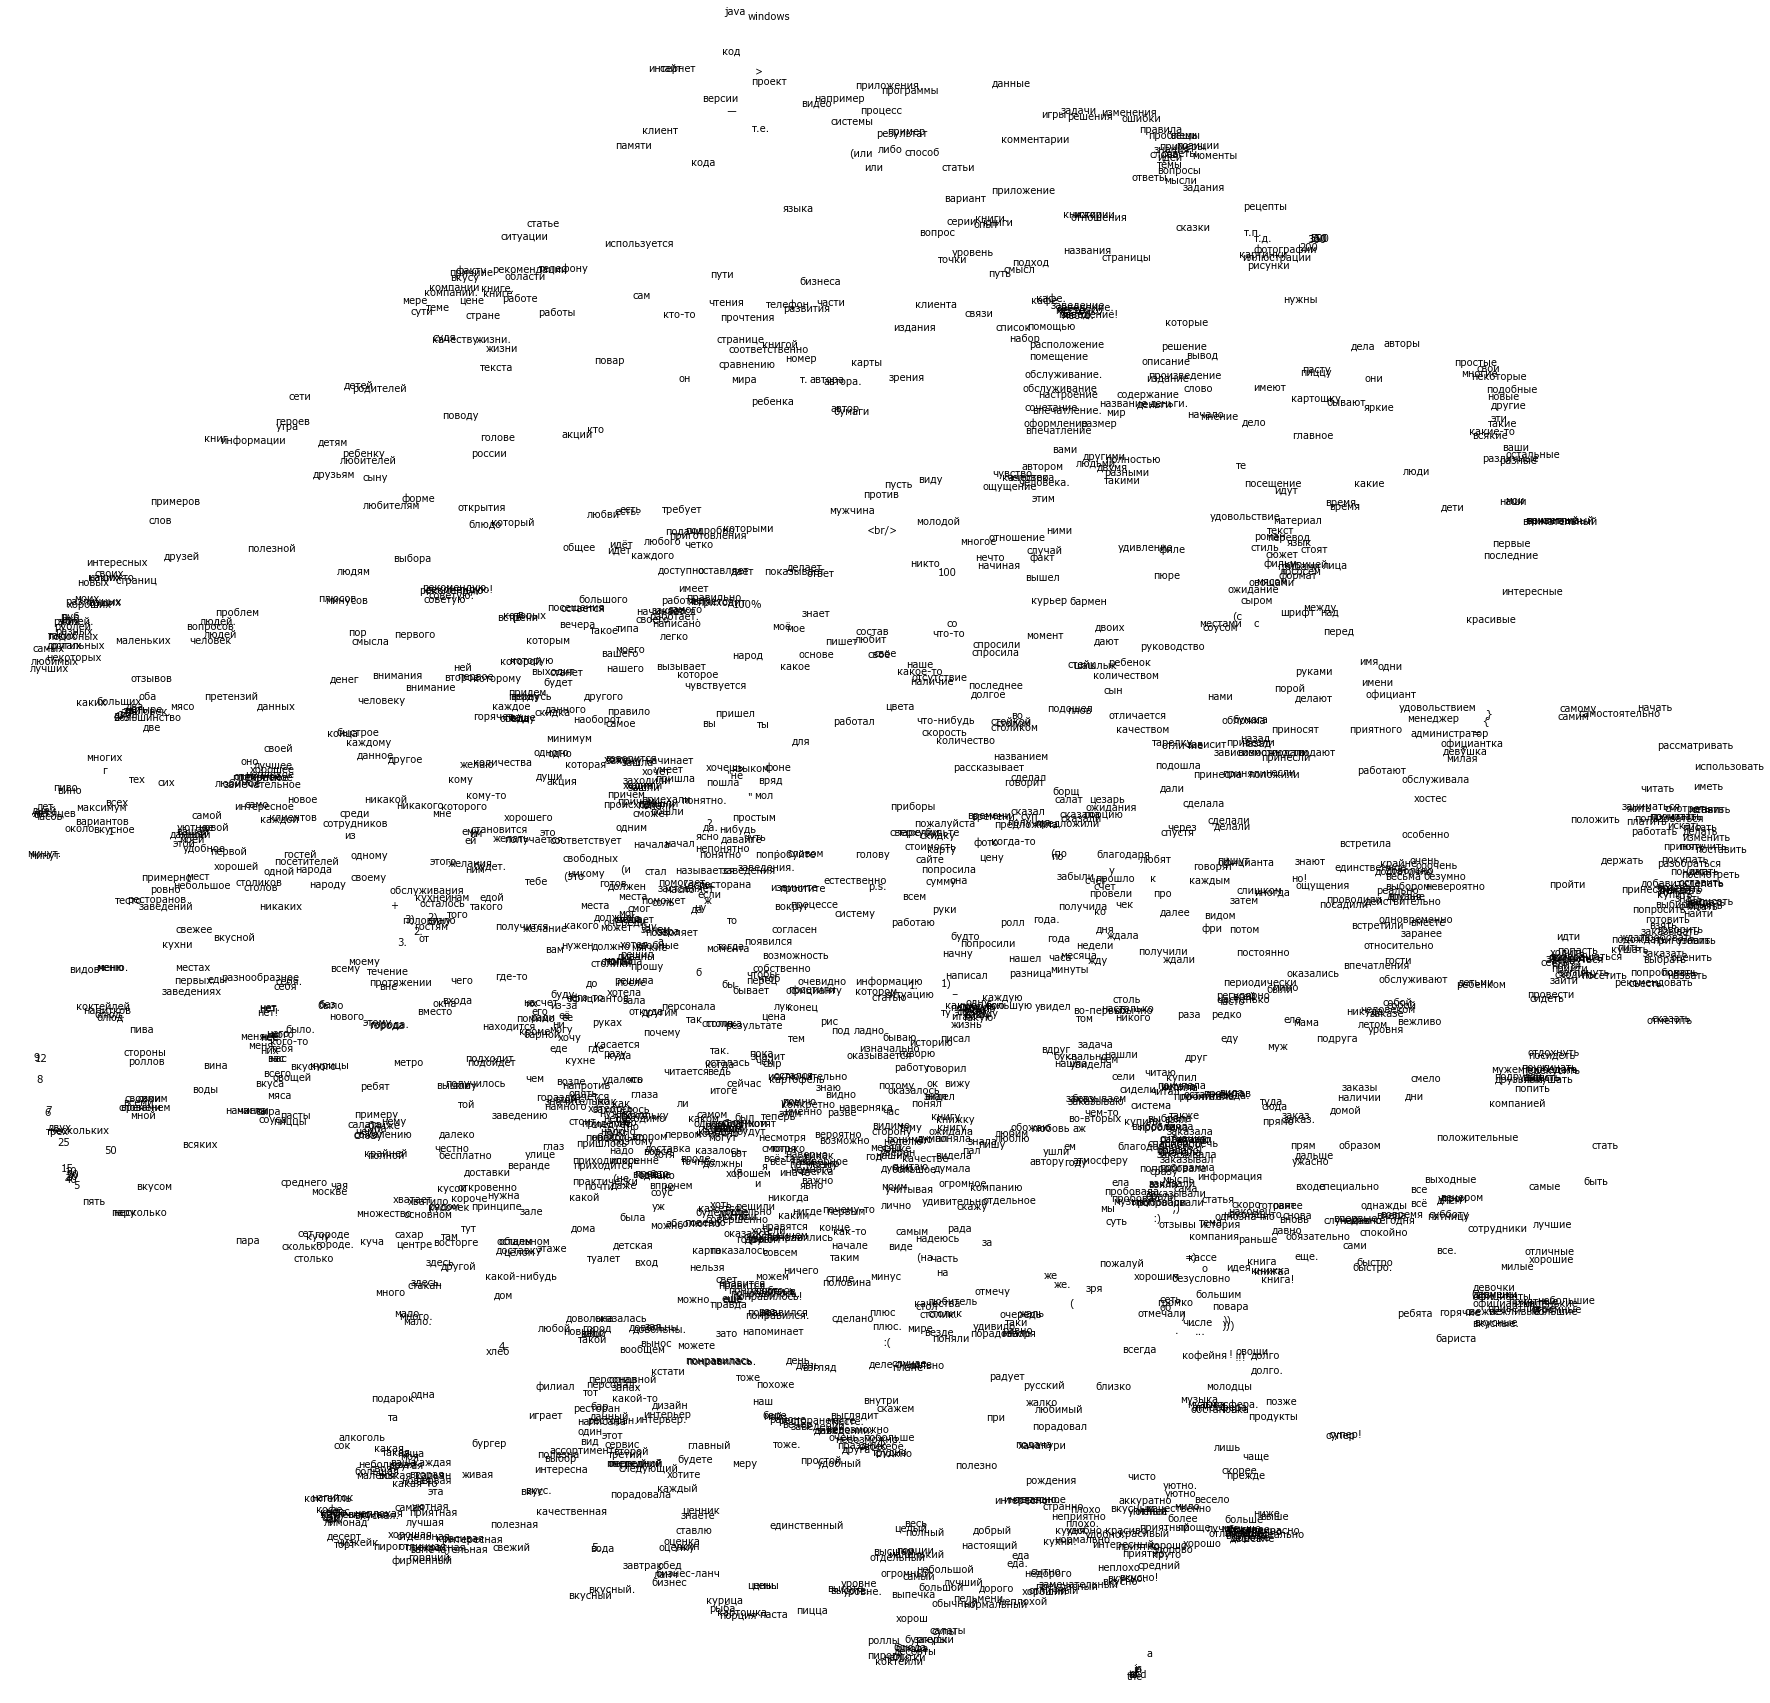

In [58]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(w2c[:,0],w2c[:,1],s=70,alpha=0.001)

ax.set_xlim(w2c[:,0].min(), w2c[:,0].max())
ax.set_ylim(w2c[:,1].min(), w2c[:,1].max())
ax.axis('off')

for idx, point in enumerate(w2c[:2000]):
    ax.annotate(model.wv.index2word[idx], point)
plt.savefig('w2v.png')

In [92]:
!open .

In [62]:
model.most_similar(positive=['плюс',],)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('минус', 0.8297944068908691),
 ('плюсик', 0.6167835593223572),
 ('плюсэто', 0.5283961892127991),
 ('плюсища', 0.508720874786377),
 ('недостаток', 0.5040649175643921),
 ('натяжка', 0.4847247898578644),
 ('балл', 0.4705561697483063),
 ('звездочка', 0.4587852656841278),
 ('минусэто', 0.4551314413547516),
 ('недочет', 0.45437294244766235)]

In [59]:
model.most_similar(positive=['студент', 'кот'])

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('молодежь', 0.5073438286781311),
 ('клерк', 0.5060752034187317),
 ('школьник', 0.5036251544952393),
 ('старик', 0.4873709976673126),
 ('фрак', 0.4842938184738159),
 ('рггу', 0.47137096524238586),
 ('папики', 0.4635358154773712),
 ('преподаватель', 0.4593200087547302),
 ('алкаш', 0.45755308866500854),
 ('кошка', 0.4559733271598816)]

In [61]:
model.most_similar(positive=['радость'], negative=['грусть'])

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('услуга', 0.4007650911808014),
 ('удовольствие', 0.40062034130096436),
 ('небесный', 0.346809059381485),
 ('мастерклассы', 0.34471359848976135),
 ('ставрополь', 0.3438653349876404),
 ('эппло', 0.3394480347633362),
 ('сфера', 0.3394111692905426),
 ('омск', 0.3381533622741699),
 ('инсталл', 0.3376481235027313),
 ('абонемент', 0.3360276520252228)]

In [9]:
model = gensim.models.Word2Vec.load('dz4word2vec')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.externals import joblib


In [16]:
tfidf = TfidfVectorizer(vocabulary=model.wv.index2word)
X = tfidf.fit_transform((' '.join(i) for i in sentences))

In [17]:
X.shape

(311024, 45182)

In [18]:
X[0].sum()

3.7776647826521179

In [19]:
joblib.dump(X, 'dz4tfidf_doc.pck')

['dz4tfidf_doc.pck']

In [67]:
X_train_source = tfidf.transform((' '.join(i) for i in train_sentences))
X_test_source = tfidf.transform((' '.join(i) for i in test_sentences))

In [21]:
print(X_train.shape, X_test.shape)

(154371, 45182) (154371, 45182)


In [22]:
model.wv.syn0.shape

(45182, 100)

In [23]:
X_train_w2v = X_train.dot(model.wv.syn0)

In [24]:
X_train_w2v.shape

(154371, 100)

In [47]:
X_test_w2v = X_test.dot(model.wv.syn0)

In [26]:
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.cross_validation import train_test_split

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
Y_train_w2v = []
with open('../dz4/source_task_train.csv','r') as f:
    f.readline()
    for line in f:
        Y_train_w2v.append(int(line.strip().split(',')[2]))
Y_train_w2v = np.array(Y_train_w2v)

In [29]:
Y_train_w2v.shape

(154371,)

In [30]:
X_train,  X_test, Y_train, Y_test = train_test_split(X_train_w2v_, Y_train_w2v)

In [110]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [111]:
Y_pred = dt.predict(X_test)

In [112]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.59      0.46      0.51      4556
          1       0.78      0.88      0.83     12991
          2       0.91      0.86      0.88      7511
          3       0.97      0.95      0.96     13535

avg / total       0.85      0.85      0.85     38593



In [113]:
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[ 2087,  2091,   165,   213],
       [  959, 11477,   424,   131],
       [  200,   834,  6429,    48],
       [  320,   272,    50, 12893]])

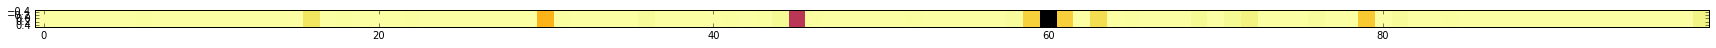

In [127]:
plt.figure(figsize=(30,30))
plt.imshow([-dt.feature_importances_], cmap='inferno', interpolation='nearest')
plt.show()

In [120]:
rf =  RandomForestClassifier(n_estimators=1000, max_depth=10, n_jobs=-1, verbose=1)

In [121]:
rf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [122]:
Y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.6s finished


In [123]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.78      0.37      0.50      4556
          1       0.79      0.94      0.86     12991
          2       0.94      0.90      0.92      7511
          3       0.97      0.98      0.98     13535

avg / total       0.88      0.88      0.87     38593



In [124]:
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[ 1686,  2515,   110,   245],
       [  337, 12252,   296,   106],
       [   63,   665,  6741,    42],
       [   79,   135,     9, 13312]])

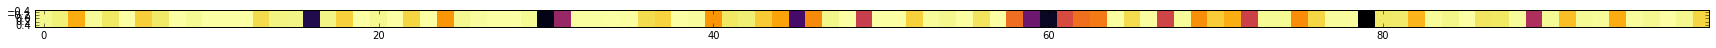

In [128]:
plt.figure(figsize=(30,30))
plt.imshow([-rf.feature_importances_], cmap='inferno', interpolation='nearest')
plt.show()

In [130]:
logreg = LogisticRegression(C=1.0)

In [131]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
Y_pred = logreg.predict(X_test)

In [133]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.75      0.61      0.67      4556
          1       0.86      0.91      0.88     12991
          2       0.94      0.94      0.94      7511
          3       0.99      0.99      0.99     13535

avg / total       0.91      0.91      0.91     38593

[[ 2764  1597   114    81]
 [  783 11838   300    70]
 [   90   296  7093    32]
 [   46    61    10 13418]]


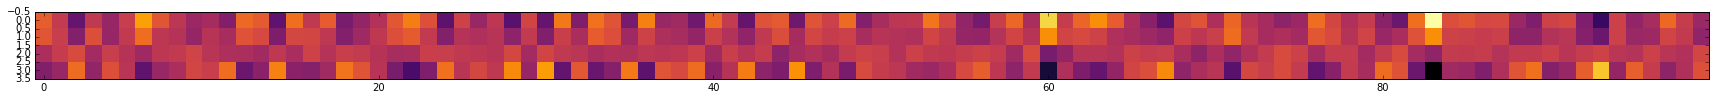

In [144]:
plt.figure(figsize=(30,30))
plt.imshow(-logreg.coef_, cmap='inferno', interpolation='nearest')
plt.show()

In [146]:
nn= MLPClassifier(hidden_layer_sizes=(100), activation='tanh',verbose=1)

In [147]:
nn.fit(X_train, Y_train)

Iteration 1, loss = 0.30089811
Iteration 2, loss = 0.23852515
Iteration 3, loss = 0.21845351
Iteration 4, loss = 0.20586889
Iteration 5, loss = 0.19654815
Iteration 6, loss = 0.18987488
Iteration 7, loss = 0.18406294
Iteration 8, loss = 0.17941074
Iteration 9, loss = 0.17509012
Iteration 10, loss = 0.17062057
Iteration 11, loss = 0.16743629
Iteration 12, loss = 0.16387440
Iteration 13, loss = 0.16092897
Iteration 14, loss = 0.15805220
Iteration 15, loss = 0.15515834
Iteration 16, loss = 0.15247175
Iteration 17, loss = 0.15039067
Iteration 18, loss = 0.14812900
Iteration 19, loss = 0.14591744
Iteration 20, loss = 0.14378541
Iteration 21, loss = 0.14239030
Iteration 22, loss = 0.14092135
Iteration 23, loss = 0.13937811
Iteration 24, loss = 0.13714098
Iteration 25, loss = 0.13566589
Iteration 26, loss = 0.13425673
Iteration 27, loss = 0.13304798
Iteration 28, loss = 0.13141631
Iteration 29, loss = 0.13043035
Iteration 30, loss = 0.12886481
Iteration 31, loss = 0.12778185
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

In [149]:
Y_pred = nn.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.65      0.62      0.63      4556
          1       0.85      0.87      0.86     12991
          2       0.93      0.93      0.93      7511
          3       0.98      0.99      0.98     13535

avg / total       0.89      0.89      0.89     38593

[[ 2818  1485   144   109]
 [ 1288 11287   338    78]
 [  120   383  6970    38]
 [   94    67    25 13349]]


In [155]:
# nn.coefs_[1].shape

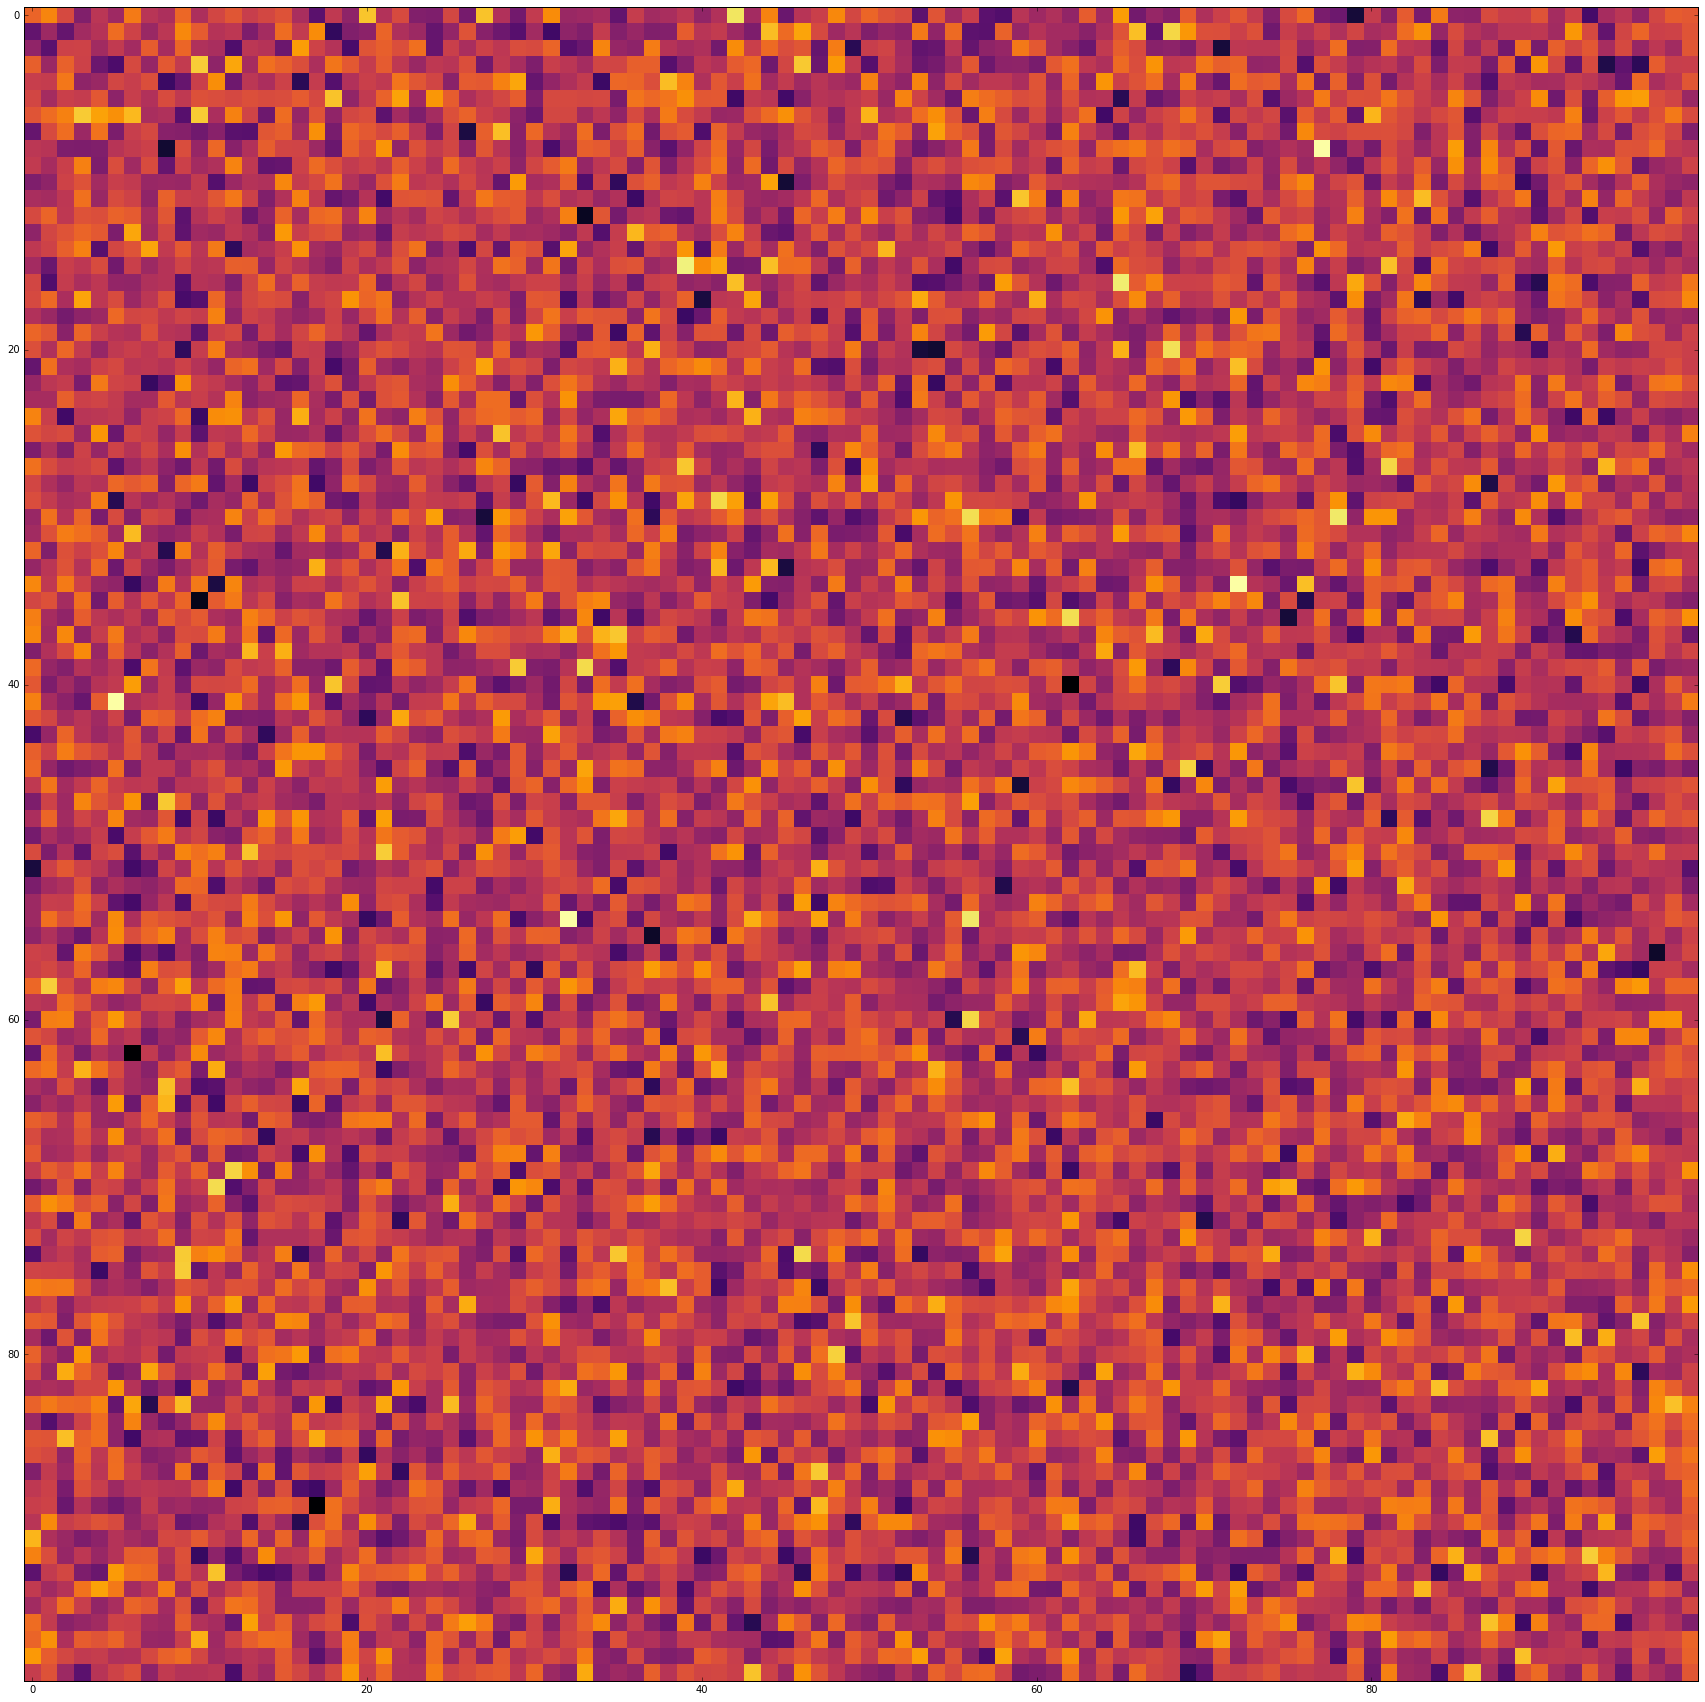

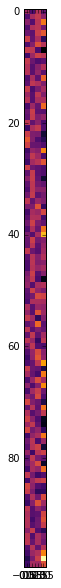

In [174]:
plt.figure(figsize=(30,30))
plt.imshow(-nn.coefs_[0], cmap='inferno', interpolation='nearest')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(-nn.coefs_[1], cmap='inferno', interpolation='nearest')
plt.show()

In [168]:
nn2= MLPClassifier(hidden_layer_sizes=(50, 2), activation='tanh',verbose=1)

In [169]:
nn2.fit(X_train, Y_train)

Iteration 1, loss = 0.97075690
Iteration 2, loss = 0.72202839
Iteration 3, loss = 0.45532949
Iteration 4, loss = 0.37961717
Iteration 5, loss = 0.34149002
Iteration 6, loss = 0.31470987
Iteration 7, loss = 0.29477387
Iteration 8, loss = 0.27757370
Iteration 9, loss = 0.26374858
Iteration 10, loss = 0.25253959
Iteration 11, loss = 0.24299451
Iteration 12, loss = 0.23548481
Iteration 13, loss = 0.22921760
Iteration 14, loss = 0.22396040
Iteration 15, loss = 0.22055088
Iteration 16, loss = 0.21640152
Iteration 17, loss = 0.21262310
Iteration 18, loss = 0.21098632
Iteration 19, loss = 0.20804065
Iteration 20, loss = 0.20583044
Iteration 21, loss = 0.20402512
Iteration 22, loss = 0.20223820
Iteration 23, loss = 0.20088743
Iteration 24, loss = 0.19912089
Iteration 25, loss = 0.19800230
Iteration 26, loss = 0.19723336
Iteration 27, loss = 0.19567895
Iteration 28, loss = 0.19508556
Iteration 29, loss = 0.19401849
Iteration 30, loss = 0.19308546
Iteration 31, loss = 0.19216697
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

In [170]:
Y_pred = nn2.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.70      0.63      0.66      4556
          1       0.86      0.89      0.87     12991
          2       0.93      0.94      0.93      7511
          3       0.99      0.99      0.99     13535

avg / total       0.90      0.90      0.90     38593

[[ 2872  1456   142    86]
 [  991 11505   407    88]
 [  134   305  7064     8]
 [  104    73     5 13353]]


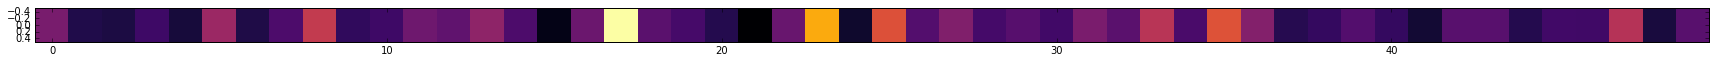

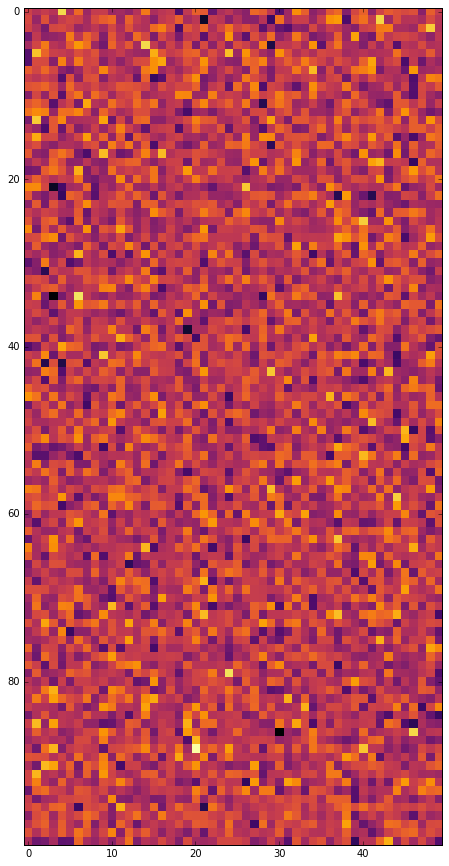

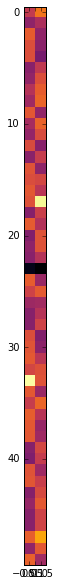

In [175]:
plt.figure(figsize=(30,15))
plt.imshow([-np.abs(nn2.coefs_[0]).sum(axis=0)], cmap='inferno', interpolation='nearest')
plt.show()
plt.figure(figsize=(30,15))
plt.imshow(-nn2.coefs_[0], cmap='inferno', interpolation='nearest')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(-nn2.coefs_[1], cmap='inferno', interpolation='nearest')
plt.show()

In [183]:
viz = np.tanh(np.tanh(X_train.dot(nn2.coefs_[0])).dot(nn2.coefs_[1]))

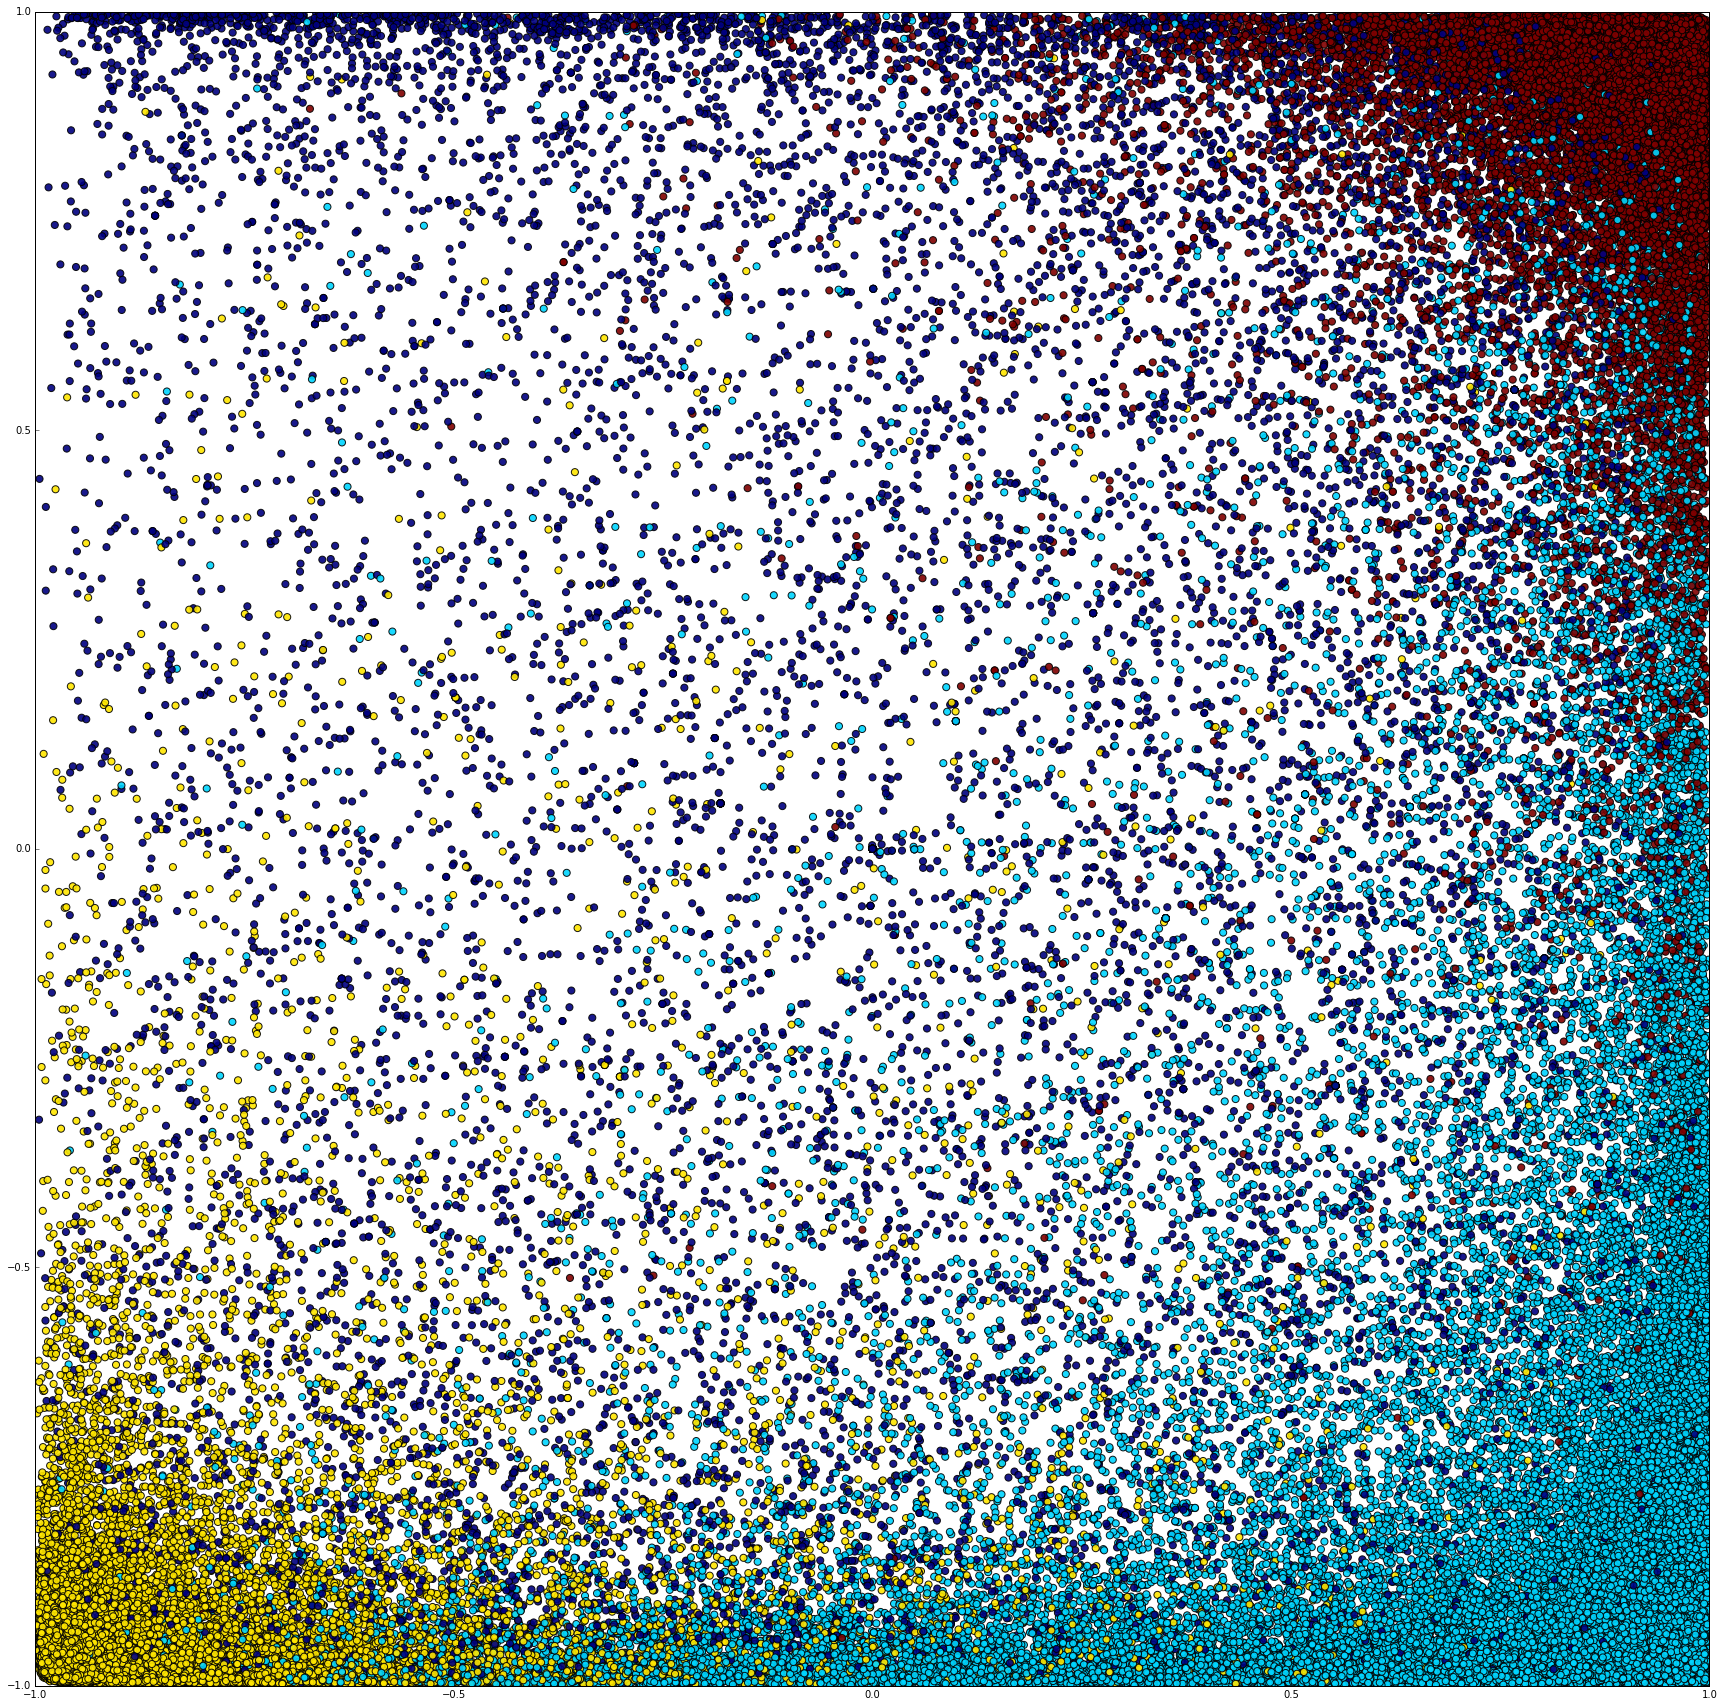

In [186]:
plt.figure(figsize=(30,30))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.scatter(viz[:,0], viz[:,1], c=Y_train, s=50, alpha=0.9)
plt.show()

In [187]:
clfs = [rf, logreg, nn, nn2]

In [188]:
Y_probs = [clf.predict_proba(X_test) for clf in clfs]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.5s finished


In [192]:
Y_pred = np.mean(Y_probs, axis=0).argmax(axis=1)

In [193]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.76      0.61      0.68      4556
          1       0.86      0.92      0.89     12991
          2       0.95      0.95      0.95      7511
          3       0.99      0.99      0.99     13535

avg / total       0.91      0.91      0.91     38593

[[ 2785  1587   109    75]
 [  759 11895   278    59]
 [   90   298  7103    20]
 [   48    54    11 13422]]


In [35]:
from sklearn.metrics import mutual_info_score, f1_score
nn3 = MLPClassifier(hidden_layer_sizes=(1024), activation='relu', verbose=1, max_iter=1)

In [36]:
nn3.fit(X_train, Y_train)

Iteration 1, loss = 0.25740293


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1024, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

In [37]:
max_f1_nn = nn3
max_f1 = 0
for i in range(50):
    
    nn3.partial_fit(X_train, Y_train)
    
    Y_pred = nn3.predict(X_test)
    
    f1 = f1_score(y_true=Y_test, y_pred=Y_pred, labels=[0,1,2,3], average='weighted')
    print(f1)
    if f1> max_f1:
        max_f1 = f1
        joblib.dump(nn3,'max_f1_nn3.pck')
#     if f1<last_f1:
#         break

Iteration 2, loss = 0.20781562
0.908805594187
Iteration 3, loss = 0.19259451
0.914984925477
Iteration 4, loss = 0.18243449
0.915940364279
Iteration 5, loss = 0.17192450
0.907991586706
Iteration 6, loss = 0.16666164
0.914300346215
Iteration 7, loss = 0.15671377
0.913405280946
Iteration 8, loss = 0.15151127
0.916425434234
Iteration 9, loss = 0.14087501
0.911494406158
Iteration 10, loss = 0.13368546
0.911779076558
Iteration 11, loss = 0.12533155
0.910927507839
Iteration 12, loss = 0.11946300
0.913162574688
Iteration 13, loss = 0.11129300
0.914464915592
Iteration 14, loss = 0.10813582
0.908718934543
Iteration 15, loss = 0.09882932
0.91115127363
Iteration 16, loss = 0.09112407
0.910680226234
Iteration 17, loss = 0.08632768
0.911156531992
Iteration 18, loss = 0.08305638
0.909587737228
Iteration 19, loss = 0.08001113
0.90870404446
Iteration 20, loss = 0.07348807
0.906410180989
Iteration 21, loss = 0.07290589
0.90740228274
Iteration 22, loss = 0.07133031
0.908290224617
Iteration 23, loss = 0.0

In [38]:
# for i in range(10):
max_f1_nn= joblib.load('max_f1_nn3.pck')
Y_pred = max_f1_nn.predict(X_test)
print(max_f1)
print(classification_report(y_true=Y_test, y_pred=Y_pred, digits=4))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))


0.916425434234
             precision    recall  f1-score   support

          0     0.7260    0.7154    0.7207      4596
          1     0.8838    0.8916    0.8877     12987
          2     0.9555    0.9475    0.9515      7473
          3     0.9906    0.9917    0.9911     13537

avg / total     0.9163    0.9165    0.9164     38593

[[ 3288  1183    64    61]
 [ 1110 11579   246    52]
 [   91   286  7081    15]
 [   40    53    20 13424]]


In [48]:
Y_target = max_f1_nn.predict(X_test_w2v)

In [49]:

with open('dz4w2v-mpl.csv','w') as sol:
    with open('../dz4/source_task_test_without_labels.csv', 'r') as f:
        sol.write('_id,label\n')
        f.readline()
        for (line, label) in zip(f, Y_target):
            data = line.split(',')
            sol.write('%s,%s\n' % (data[0], label))
#             yield preprocessing(line.strip().split(',')[1].lower()).split()

In [50]:
!wc dz4w2v-mpl.csv

  156654  156654 1299200 dz4w2v-mpl.csv


In [51]:
! wc ../dz4/source_task_test_without_labels.csv

  156654 9656323 111706317 ../dz4/source_task_test_without_labels.csv


In [218]:
Y_pred = nn3.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))


             precision    recall  f1-score   support

          0       0.67      0.68      0.68      4556
          1       0.88      0.87      0.87     12991
          2       0.94      0.94      0.94      7511
          3       0.99      0.99      0.99     13535

avg / total       0.90      0.90      0.90     38593

[[ 3103  1271   113    69]
 [ 1311 11283   321    76]
 [  133   286  7072    20]
 [   90    51    34 13360]]


In [52]:
w2v512 = gensim.models.Word2Vec(
    size=512,
    max_vocab_size=10**5*2,
    min_count=5,
    workers=multiprocessing.cpu_count()
)

In [55]:
w2v512.build_vocab(sentences=sentences)

2018-01-18 19:48:24,084 : INFO : collecting all words and their counts
2018-01-18 19:48:24,086 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-18 19:48:24,330 : INFO : PROGRESS: at sentence #10000, processed 430261 words, keeping 32691 word types
2018-01-18 19:48:24,581 : INFO : PROGRESS: at sentence #20000, processed 854636 words, keeping 48247 word types
2018-01-18 19:48:24,827 : INFO : PROGRESS: at sentence #30000, processed 1286765 words, keeping 60734 word types
2018-01-18 19:48:25,075 : INFO : PROGRESS: at sentence #40000, processed 1724216 words, keeping 72253 word types
2018-01-18 19:48:25,313 : INFO : PROGRESS: at sentence #50000, processed 2151102 words, keeping 82793 word types
2018-01-18 19:48:25,548 : INFO : PROGRESS: at sentence #60000, processed 2564945 words, keeping 92323 word types
2018-01-18 19:48:25,791 : INFO : PROGRESS: at sentence #70000, processed 2992124 words, keeping 101523 word types
2018-01-18 19:48:26,025 : INFO : PROGRES

In [57]:
w2v512.train(sentences=sentences, epochs=1,total_examples=model.corpus_count)

2018-01-18 19:49:28,296 : INFO : training model with 8 workers on 45182 vocabulary and 512 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-18 19:49:29,300 : INFO : PROGRESS: at 6.28% examples, 737633 words/s, in_qsize 0, out_qsize 0
2018-01-18 19:49:30,322 : INFO : PROGRESS: at 12.11% examples, 709109 words/s, in_qsize 11, out_qsize 1
2018-01-18 19:49:31,329 : INFO : PROGRESS: at 18.66% examples, 725525 words/s, in_qsize 0, out_qsize 0
2018-01-18 19:49:32,349 : INFO : PROGRESS: at 24.62% examples, 712214 words/s, in_qsize 13, out_qsize 1
2018-01-18 19:49:33,364 : INFO : PROGRESS: at 29.77% examples, 689244 words/s, in_qsize 16, out_qsize 0
2018-01-18 19:49:34,368 : INFO : PROGRESS: at 35.69% examples, 689467 words/s, in_qsize 16, out_qsize 0
2018-01-18 19:49:35,369 : INFO : PROGRESS: at 41.99% examples, 696549 words/s, in_qsize 0, out_qsize 0
2018-01-18 19:49:36,396 : INFO : PROGRESS: at 47.82% examples, 691945 words/s, in_qsize 11, out_qsize 3
2018-01-18 19:49:37,41

11533300

In [89]:
w2v512.train(sentences=sentences, epochs=150,total_examples=model.corpus_count)

2018-01-18 21:28:18,117 : INFO : training model with 8 workers on 45182 vocabulary and 512 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-01-18 21:28:19,144 : INFO : PROGRESS: at 0.04% examples, 747199 words/s, in_qsize 11, out_qsize 0
2018-01-18 21:28:20,146 : INFO : PROGRESS: at 0.09% examples, 760787 words/s, in_qsize 11, out_qsize 1
2018-01-18 21:28:21,159 : INFO : PROGRESS: at 0.14% examples, 787402 words/s, in_qsize 0, out_qsize 3
2018-01-18 21:28:22,161 : INFO : PROGRESS: at 0.19% examples, 807263 words/s, in_qsize 1, out_qsize 0
2018-01-18 21:28:23,179 : INFO : PROGRESS: at 0.23% examples, 816788 words/s, in_qsize 0, out_qsize 0
2018-01-18 21:28:24,184 : INFO : PROGRESS: at 0.27% examples, 797623 words/s, in_qsize 8, out_qsize 2
2018-01-18 21:28:25,241 : INFO : PROGRESS: at 0.32% examples, 781878 words/s, in_qsize 14, out_qsize 1
2018-01-18 21:28:26,248 : INFO : PROGRESS: at 0.36% examples, 784509 words/s, in_qsize 0, out_qsize 0
2018-01-18 21:28:27,269 : INFO 

1730125871

In [90]:
w2v512.most_similar('видяха')

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-01-18 22:10:58,577 : INFO : precomputing L2-norms of word weight vectors


[('шаблонизатор', 0.21192872524261475),
 ('вьетнамец', 0.20049205422401428),
 ('быстрой', 0.1982283592224121),
 ('линух', 0.19643384218215942),
 ('видях', 0.1923404484987259),
 ('свитч', 0.1919284462928772),
 ('нахрен', 0.19060377776622772),
 ('зачем', 0.1904451698064804),
 ('фастфудно', 0.18776220083236694),
 ('музсопровождение', 0.18218304216861725)]

In [68]:
X_train_source.shape, X_test_source.shape

((154371, 45182), (156653, 45182))

In [69]:
joblib.dump(X_train_source, 'X_train_source_tfidf.pck', )
joblib.dump(X_test_source, 'X_test_source_tfidf.pck', )

['X_test_source_tfidf.pck']

In [70]:
joblib.dump(tfidf, 'tfidf_vec.pck')

['tfidf_vec.pck']

In [122]:
X_train,  X_test, Y_train, Y_test = train_test_split(X_train_source.dot(w2v512.wv.syn0), Y_train_w2v, test_size=0.1)

In [92]:
rf512 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=1, max_depth=9)

In [93]:
rf512.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [94]:
Y_pred = rf512.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.8s finished


In [95]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.83      0.24      0.37      4525
          1       0.75      0.96      0.85     12960
          2       0.96      0.89      0.92      7572
          3       0.97      0.98      0.97     13536

avg / total       0.88      0.87      0.85     38593

[[ 1072  3069    79   305]
 [  148 12504   203   105]
 [   27   791  6708    46]
 [   52   219     9 13256]]


In [86]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.82      0.28      0.41      4468
          1       0.77      0.96      0.85     13166
          2       0.95      0.89      0.92      7580
          3       0.97      0.98      0.98     13379

avg / total       0.88      0.88      0.86     38593

[[ 1234  2892   101   241]
 [  192 12624   242   108]
 [   31   720  6769    60]
 [   48   168     6 13157]]


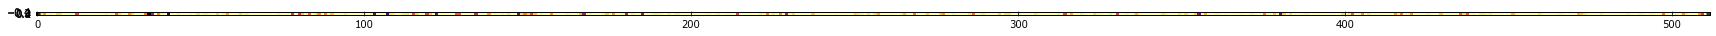

In [87]:
plt.figure(figsize=(30,30))
plt.imshow([-rf512.feature_importances_], cmap='inferno', interpolation='nearest')
plt.show()

In [81]:
X_train.shape

(115778, 100)

In [88]:
w2v512.save('w2v512')

2018-01-18 20:35:36,907 : INFO : saving Word2Vec object under w2v512, separately None
2018-01-18 20:35:36,908 : INFO : storing np array 'syn0' to w2v512.wv.syn0.npy
2018-01-18 20:35:37,052 : INFO : not storing attribute syn0norm
2018-01-18 20:35:37,054 : INFO : storing np array 'syn1neg' to w2v512.syn1neg.npy
2018-01-18 20:35:37,216 : INFO : not storing attribute cum_table
2018-01-18 20:35:37,354 : INFO : saved w2v512


In [139]:

nn4 = MLPClassifier(hidden_layer_sizes=(32,16), activation='tanh', verbose=1, max_iter=1)

In [132]:
nn4.fit(X_train, Y_train)

Iteration 1, loss = 0.31576148


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

In [134]:
max_f1_nn = nn4
max_f1 = 0
for i in range(50):
    nn4.partial_fit(X_train, Y_train)
    Y_pred = nn4.predict(X_test)
    f1 = f1_score(y_true=Y_test, y_pred=Y_pred, labels=[0,1,2,3], average='weighted')
    print(f1)
    if f1> max_f1:
        max_f1 = f1
        joblib.dump(nn4,'max_f1_nn4.pck')
#     if f1 < 0.9: break

Iteration 2, loss = 0.23693769
0.903929003256
Iteration 3, loss = 0.21491711
0.905484074717
Iteration 4, loss = 0.20043952
0.907026457471
Iteration 5, loss = 0.18951927
0.907417095429
Iteration 6, loss = 0.18054515
0.906967328151
Iteration 7, loss = 0.17251794
0.906927741432
Iteration 8, loss = 0.16696314
0.908405319951
Iteration 9, loss = 0.16110938
0.906209211288
Iteration 10, loss = 0.15678487
0.907825105159
Iteration 11, loss = 0.15165770
0.906251310394
Iteration 12, loss = 0.14810118
0.907498935889
Iteration 13, loss = 0.14387172
0.906189495243
Iteration 14, loss = 0.14031688
0.905538690408
Iteration 15, loss = 0.13766532
0.9052269914
Iteration 16, loss = 0.13397182
0.905459072331
Iteration 17, loss = 0.13141847
0.903309431914
Iteration 18, loss = 0.12840164
0.903396016413
Iteration 19, loss = 0.12564046
0.902260788679
Iteration 20, loss = 0.12352290
0.902656758863
Iteration 21, loss = 0.12144974
0.901381131122
Iteration 22, loss = 0.11849262
0.900159419612
Iteration 23, loss = 0.

In [135]:
max_f1_nn= joblib.load('max_f1_nn4.pck')
Y_pred = max_f1_nn.predict(X_test)
print(max_f1)
print(classification_report(y_true=Y_test, y_pred=Y_pred, digits=4))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

0.908405319951
             precision    recall  f1-score   support

          0     0.7408    0.6632    0.6998      1909
          1     0.8720    0.8933    0.8825      5156
          2     0.9327    0.9481    0.9404      2911
          3     0.9863    0.9910    0.9887      5462

avg / total     0.9077    0.9098    0.9084     15438

[[1266  545   57   41]
 [ 386 4606  135   29]
 [  37  109 2760    5]
 [  20   22    7 5413]]


In [103]:
nn4.coefs_[0].shape

(512, 1024)

In [104]:
X_test.shape

(38593, 512)

In [136]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
Y_pred = logreg.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred, digits=4))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0     0.7778    0.6475    0.7067      1909
          1     0.8623    0.9156    0.8882      5156
          2     0.9481    0.9471    0.9476      2911
          3     0.9914    0.9921    0.9918      5462

avg / total     0.9137    0.9155    0.9136     15438

[[1236  614   34   25]
 [ 306 4721  111   18]
 [  30  120 2757    4]
 [  17   20    6 5419]]


In [138]:
logreg2 = LogisticRegression(C=0.1)
logreg2.fit(X_train, Y_train)
Y_pred = logreg2.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred, digits=4))
print(confusion_matrix(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0     0.7775    0.6443    0.7047      1909
          1     0.8617    0.9158    0.8879      5156
          2     0.9481    0.9474    0.9478      2911
          3     0.9910    0.9919    0.9915      5462

avg / total     0.9133    0.9151    0.9132     15438

[[1230  617   34   28]
 [ 306 4722  111   17]
 [  30  119 2758    4]
 [  16   22    6 5418]]
